In [1]:
import pandas as pd
from analisi_grafica_funzioni import analisi_grafica

In [2]:
marziani=pd.read_csv('./marziani.csv')
marziani

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,viola,20.0,3.87,14.77,73.22
1,Robby,viola,27.0,3.15,28.19,88.44
2,Robby,viola,25.0,4.35,12.05,76.74
3,Robby,blu,20.0,3.76,9.90,81.37
4,Robby,blu,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,Simmy,viola,29.0,4.55,35.48,68.47
1996,Simmy,blu,23.0,3.84,29.86,71.51
1997,Simmy,viola,22.0,4.55,29.41,68.38
1998,Simmy,rosso,27.0,4.53,33.12,68.10


In [3]:
print(f"""

{marziani.head()}

{marziani.columns}

{marziani.dtypes}
""")
#panoramica generale
#tipo di colonne



  specie colore  n_arti  peso  altezza  larghezza
0  Robby  viola    20.0  3.87    14.77      73.22
1  Robby  viola    27.0  3.15    28.19      88.44
2  Robby  viola    25.0  4.35    12.05      76.74
3  Robby    blu    20.0  3.76     9.90      81.37
4  Robby    blu    28.0  2.86    19.87      84.65

Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')

specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object



prima di creare il nostro modello di machine learning dobbiamo eliminare tutti i valori nulli, non possiamo dare in pasto al nostro algoritmo qualcosa con dati mancanti, potrebbe causare errori


se il nome colonna non ha spazi, posso usare nomedataframe.nomecolonna al posto che nomedataframe[nomecolonna]

In [4]:
for specie in marziani.specie.unique():
    print(f">> {specie}")
    dati=marziani[marziani.specie==specie]
    for f in marziani.columns[1:]:
        print(dati[f].describe())

>> Robby
count     995
unique      3
top       blu
freq      340
Name: colore, dtype: object
count    999.000000
mean      24.637638
std        2.899248
min       20.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       29.000000
Name: n_arti, dtype: float64
count    1000.000000
mean        3.500900
std         0.489139
min         2.130000
25%         3.170000
50%         3.490000
75%         3.830000
max         5.050000
Name: peso, dtype: float64
count    996.000000
mean      17.518082
std        4.227621
min        3.170000
25%       14.740000
50%       17.330000
75%       20.307500
max       29.400000
Name: altezza, dtype: float64
count    999.000000
mean      84.719429
std       11.456814
min       44.700000
25%       77.045000
50%       84.890000
75%       92.510000
max      117.450000
Name: larghezza, dtype: float64
>> Simmy
count       998
unique        3
top       rosso
freq        339
Name: colore, dtype: object
count    995.000000
mean      24.544724


per confrintare i dati usiamo i grafici per individuare delle features

In [3]:
analisi_grafica?

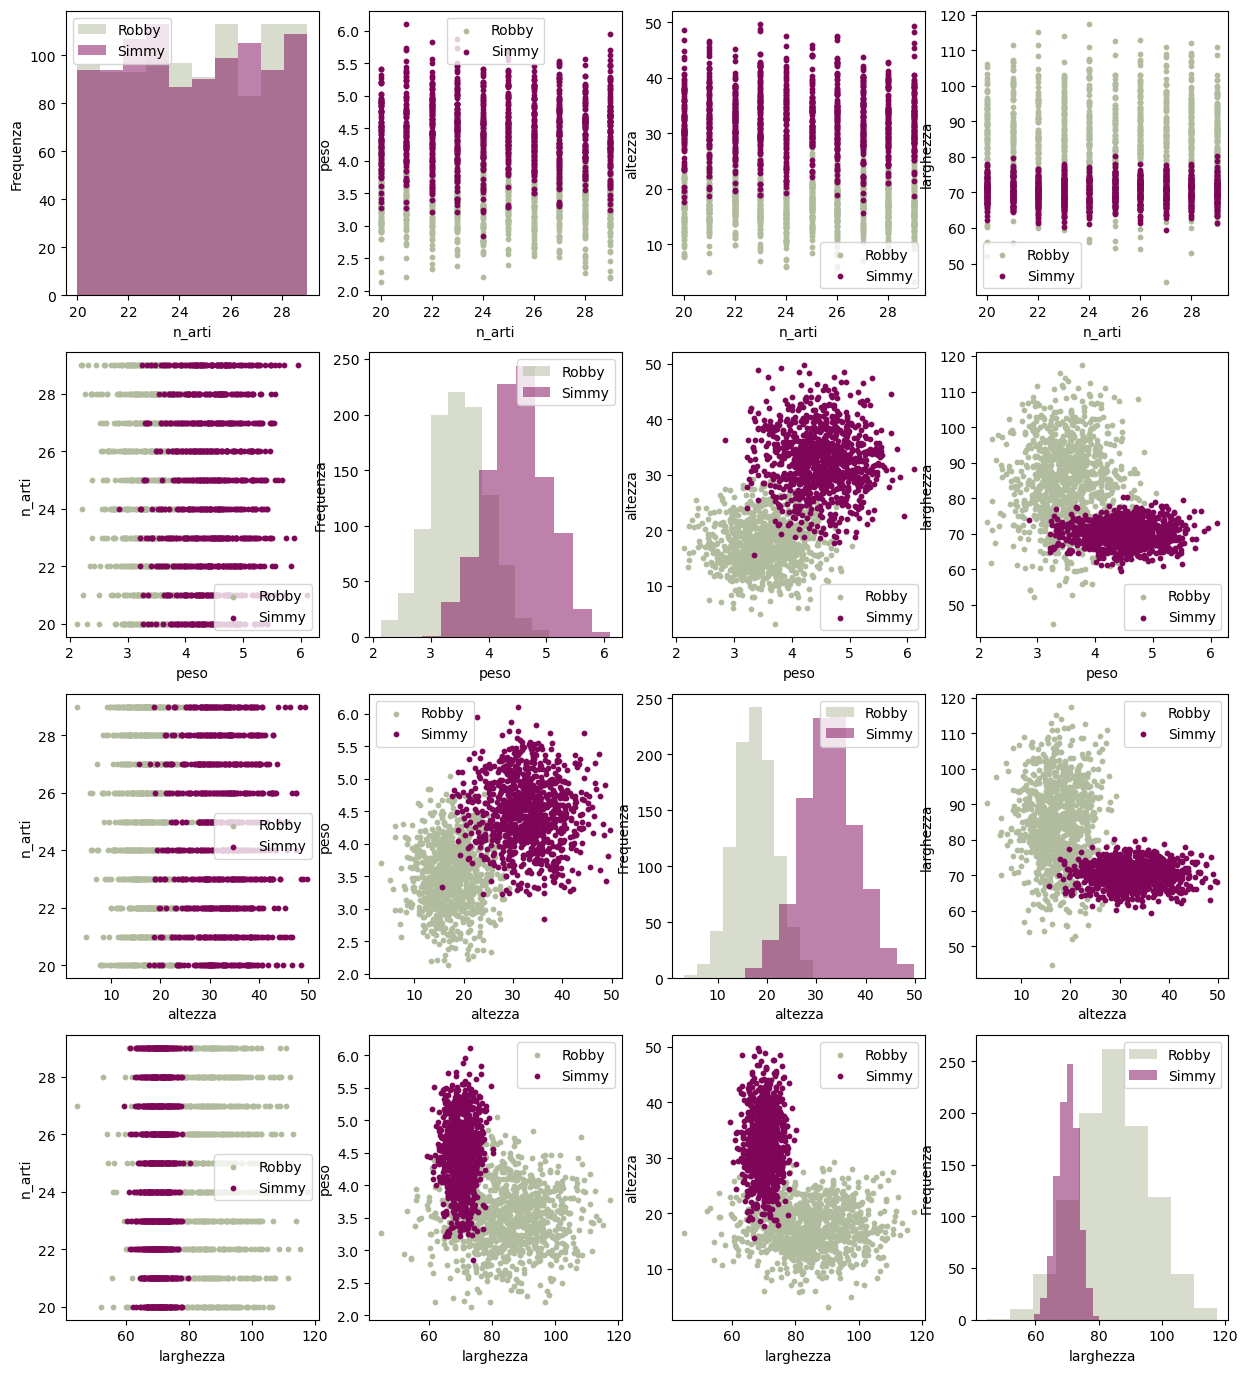

In [4]:
analisi_grafica("specie",marziani,alpha=0.5)

### correlazione
tra 2 valori, esempio ore di studio e rendimento, si ha una causalità, + studi + rendi

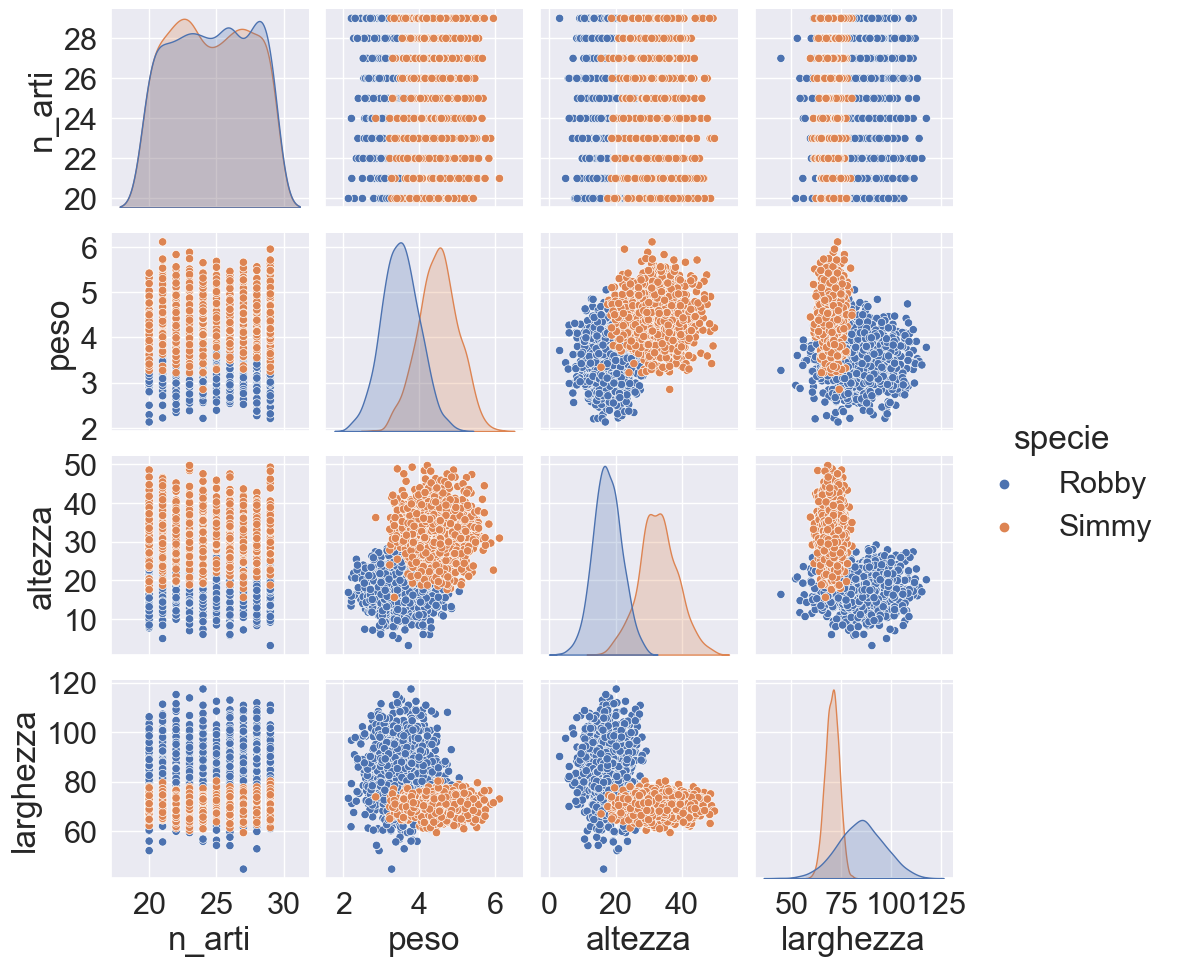

In [5]:
import seaborn as sns

sns.set_theme(font_scale=2)
sns.pairplot(marziani, hue="specie", dropna=True)
sns.set()

la diagonale principale ci da delle informazioni statistiche sulla distribuzione delle feature

quando 2 grafici si sovrappongono vuol dire che a livello statistico si assomigliano

per sistinguere i marziani usiamo i dati con i grafici più differenti

il colore è una stringa ma a un algoritmo, ossia feature qualitative non posso passsargli una stringa ma devo mapparle secondo un valore numerico, per farlo ci conviene ordinare l'array e lo mappiano con colori da 0 a 1

#### eliminazione dei nan

- 1 elimino i valori all'inizio
- 2 elimino i null presenti solo nelle colonne interessate
-> eliminiamo il minor numero possibile di elementi, per insegnare alla macchina in maniera più accurata

se abbiamo n feature per creare un algorimo accurato come minimo n*10 campioni

In [6]:
##mi rileva quali colonne hanno valori nulli, se è 0 no nulli
cols_with_missinf=[col for col in marziani.columns if marziani[col].isnull().sum()]
print(cols_with_missinf)
select_cols=["peso","altezza","larghezza"]


['colore', 'n_arti', 'altezza', 'larghezza']


quando facciamo un'operazione di drop possiamo fare una subset, controlla solo le colonne che gli passiamo

In [7]:
d=marziani.dropna(axis="index",subset=select_cols)
d.shape

(1992, 6)

In [8]:
print([col for col in d.columns if d[col].isnull().sum()])

['colore', 'n_arti']


In [9]:
x=d[select_cols]
y=d["specie"]

print(F"""

{x.head()}

{y.head()}

""")



   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65

0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object




## training
il modello ha bisogno di molti dati, bisogna dargli un set di train più grande di quello di test

preparazione dei set di train e test, usiamo una libreria apposita

In [28]:
from sklearn.model_selection import train_test_split
#gli passo i 2 set di prima, quelli ripuliti dai null e la grandezza, va da 0 a 1, rapprensenta la percentuale di dati da inserire
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=0)
#random_state, questo imposta un seed, questo ci rende il random pseudo casuale, imposta il seme

print(x_train.head())

      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47


In [30]:
#normalizziamo i dati
x_train_std=((x_train-x_train.mean())/x_train.std())
print("x_train_normalizzaato: \n",x_train_std.describe())

x_train_normalizzaato: 
                peso       altezza     larghezza
count  1.394000e+03  1.394000e+03  1.394000e+03
mean   1.503659e-16 -9.174870e-17 -1.376231e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.536124e+00 -2.409953e+00 -2.296781e+00
25%   -7.419855e-01 -8.630136e-01 -7.241093e-01
50%   -7.377697e-03 -1.173433e-01 -3.595044e-01
75%    7.554843e-01  8.455417e-01  6.667149e-01
max    2.987562e+00  2.572085e+00  3.444039e+00


preparare i dati è importante, la qualità di quello che otteniamo dipende dalla qualità di ciò che gli diamo

#### controllo
dobbiamo controllare che il processo di normalizzazione non abbia alterato i nostri dati, plottiamo da una parte i dati normalizzati e dall'altra quelli non normalizzati

peso
altezza
larghezza


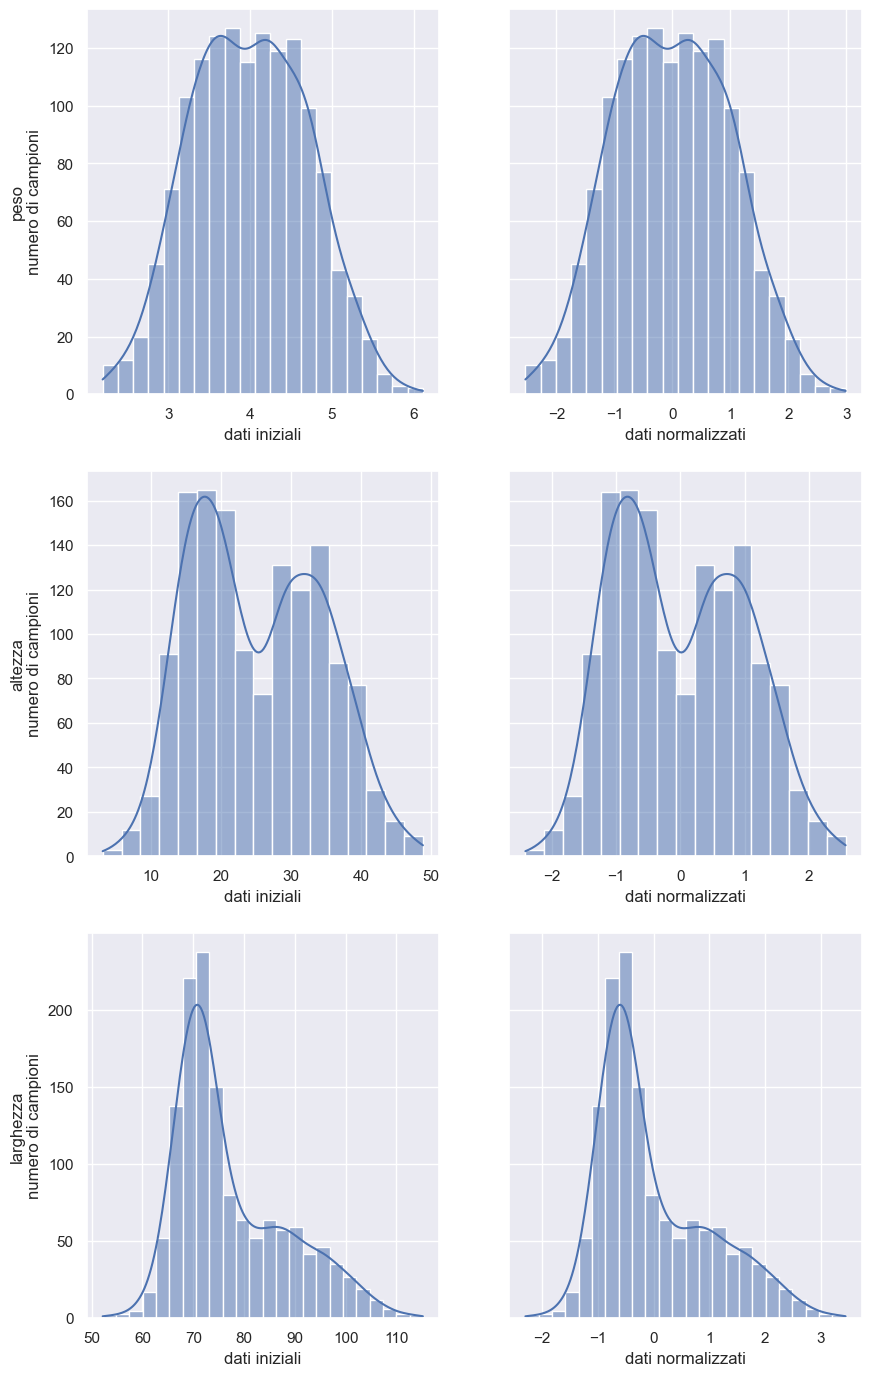

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs=plt.subplots(3,2,figsize=(10,17),sharey='row')

for i, ax in enumerate(axs):
    col=select_cols[i]
    print(col)
    
    ax[0].set_xlabel("dati iniziali")
    ax[1].set_xlabel("dati normalizzati")
    ax[0].set_ylabel(f"{col}\nnumero di campioni")
    
    sns.histplot(ax=ax[0], x=x_train[col],kde=True)
    sns.histplot(ax=ax[1], x=x_train_std[col],kde=True)
    
sns.set()

In [15]:
sns.histplot?

la normalizzazioni effettua delle traslazioni sull'asse delle x, kde aggiunge la linea smussata, interpola le barre (kernel density estimation)

In [32]:
#normaliziamo il set di test
m=x_test.mean()
s=x_test.std()

x_test_std=((x_test-m)/s)
print(x_test_std.describe())

               peso       altezza     larghezza
count  5.980000e+02  5.980000e+02  5.980000e+02
mean   9.208539e-17 -3.029906e-16 -1.366428e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.665262e+00 -1.944670e+00 -2.900476e+00
25%   -7.496564e-01 -8.388062e-01 -7.195091e-01
50%   -1.343496e-02 -1.291554e-01 -3.533389e-01
75%    7.478037e-01  7.968119e-01  6.525844e-01
max    2.409663e+00  2.749179e+00  3.499255e+00


### multilaier percettron

una rete neurale è composta da input, output e layer nascosti

In [33]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=300)
#hidden layer size=numero di layer nascosti
#random_state = seme randomico
#max_iter= legge il set di train per 300 volte, lo fa tot volte

In [34]:
model.fit(x_train_std, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=1)

In [35]:
print(f"""
Tain
{y_train.values[:5]}
{model.predict(x_train_std[:5])}
""")


Tain
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']



ora cci ha dato una risposta ma non sappiamo l'accuratezza dei dati

uso una libreria per calcolare l'accuratezza

In [36]:
print(f"accuratezza set train: {model.score(x_train_std,y_train)}")
print(f"accuratezza set test: {model.score(x_test_std,y_test)}")

accuratezza set train: 0.9835007173601148
accuratezza set test: 0.9732441471571907


la rete neurale grazie al metodo fit impara come distinguere i vari dati del machine learning

#### validazione del modello

vogliamo capire se c'è un avalore migliore di max iter per migliorare l'accuratezza

partiamo da 100 e arriviamo a 300, plottiamo e vediamo

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

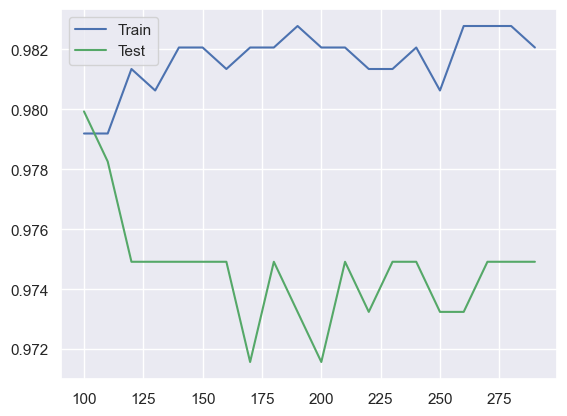

In [42]:
import numpy as np
from sklearn.neural_network import MLPClassifier
start=100
stop=300
passo=10

vEpochs=np.arange(start,stop,passo)
vAccTrain=[]
vAccTest=[]
for e in vEpochs:
    mlp=MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=e)
    mlp.fit(x_train_std,y_train)
    vAccTrain.append(mlp.score(x_train_std,y_train))
    vAccTest.append(mlp.score(x_test_std,y_test))
    
import matplotlib.pyplot as plt
plt.plot(vEpochs, vAccTrain, c="b",label="Train")
plt.plot(vEpochs, vAccTest, c="g",label="Test")
plt.legend()

abbiamo plottato il variare dell'accuratezza rispetto ai cicli di apprendimento

con 100 si hanno punteggi più alti, dopo l'algoritmo impara a memoria e quindi rischia di sbagliare

il punto di intersezione dove si incontrano le 2 funizioni è il punto ottimale oltre al quale non far studiare il modello

- in alcuni casi non si ha un punto di incontro tra le funzioni, dobbiamo imparare a interpretare il grafico

In [44]:
model01=MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=115)
model01.fit(x_train_std, y_train)
print(f"accuratezza set train: {model01.score(x_train_std,y_train)}")
print(f"accuratezza set test: {model01.score(x_test_std,y_test)}")

accuratezza set train: 0.9799139167862266
accuratezza set test: 0.9782608695652174


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


->>> abbiamo migliorato il nostro processo di machine learning